# Explained Variance Score: Una Métrica Fundamental para Evaluar Modelos de Regresión

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== EJEMPLO: EXPLAINED VARIANCE SCORE ===\n")


=== EJEMPLO: EXPLAINED VARIANCE SCORE ===



In [4]:
# 1. Generación de datos sintéticos para regresión

# Creamos un dataset sintético con diferentes niveles de ruido
X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, 
                       noise=10, random_state=42)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# 2. ENTRENAMIENTO DE MODELOS
print("2. ENTRENAMIENTO DE MODELOS")
print("-" * 40)

# Modelo 1: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Modelo 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


2. ENTRENAMIENTO DE MODELOS
----------------------------------------


In [8]:
# 3. CÁLCULO DE MÉTRICAS
print("3. MÉTRICAS DE EVALUACIÓN")
print("-" * 40)

# Explained Variance Score
evs_lr = explained_variance_score(y_test, lr_pred)
evs_rf = explained_variance_score(y_test, rf_pred)

# Métricas adicionales
r2_lr = r2_score(y_test, lr_pred)
r2_rf = r2_score(y_test, rf_pred)
mae_lr = mean_absolute_error(y_test, lr_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)

print(f"REGRESIÓN LINEAL:")
print(f"  Explained Variance Score: {evs_lr:.4f}")
print(f"  R² Score: {r2_lr:.4f}")
print(f"  MAE: {mae_lr:.2f}")

print(f"\nRANDOM FOREST:")
print(f"  Explained Variance Score: {evs_rf:.4f}")
print(f"  R² Score: {r2_rf:.4f}")
print(f"  MAE: {mae_rf:.2f}")


3. MÉTRICAS DE EVALUACIÓN
----------------------------------------
REGRESIÓN LINEAL:
  Explained Variance Score: 0.9661
  R² Score: 0.9657
  MAE: 7.97

RANDOM FOREST:
  Explained Variance Score: 0.9372
  R² Score: 0.9358
  MAE: 10.64


In [10]:
# 4. IMPLEMENTACIÓN MANUAL
def explained_variance_manual(y_true, y_pred):
    """
    Implementación manual del Explained Variance Score
    Formula: 1 - Var(y_true - y_pred) / Var(y_true)
    """
    residuals = y_true - y_pred
    var_residuals = np.var(residuals)
    var_y_true = np.var(y_true)
    return 1 - (var_residuals / var_y_true)

print("\n4. VERIFICACIÓN CON IMPLEMENTACIÓN MANUAL")
print("-" * 50)
evs_manual_lr = explained_variance_manual(y_test, lr_pred)
evs_manual_rf = explained_variance_manual(y_test, rf_pred)

print(f"Regresión Lineal - Manual: {evs_manual_lr:.4f}")
print(f"Regresión Lineal - Sklearn: {evs_lr:.4f}")
print(f"Random Forest - Manual: {evs_manual_rf:.4f}")
print(f"Random Forest - Sklearn: {evs_rf:.4f}")



4. VERIFICACIÓN CON IMPLEMENTACIÓN MANUAL
--------------------------------------------------
Regresión Lineal - Manual: 0.9661
Regresión Lineal - Sklearn: 0.9661
Random Forest - Manual: 0.9372
Random Forest - Sklearn: 0.9372


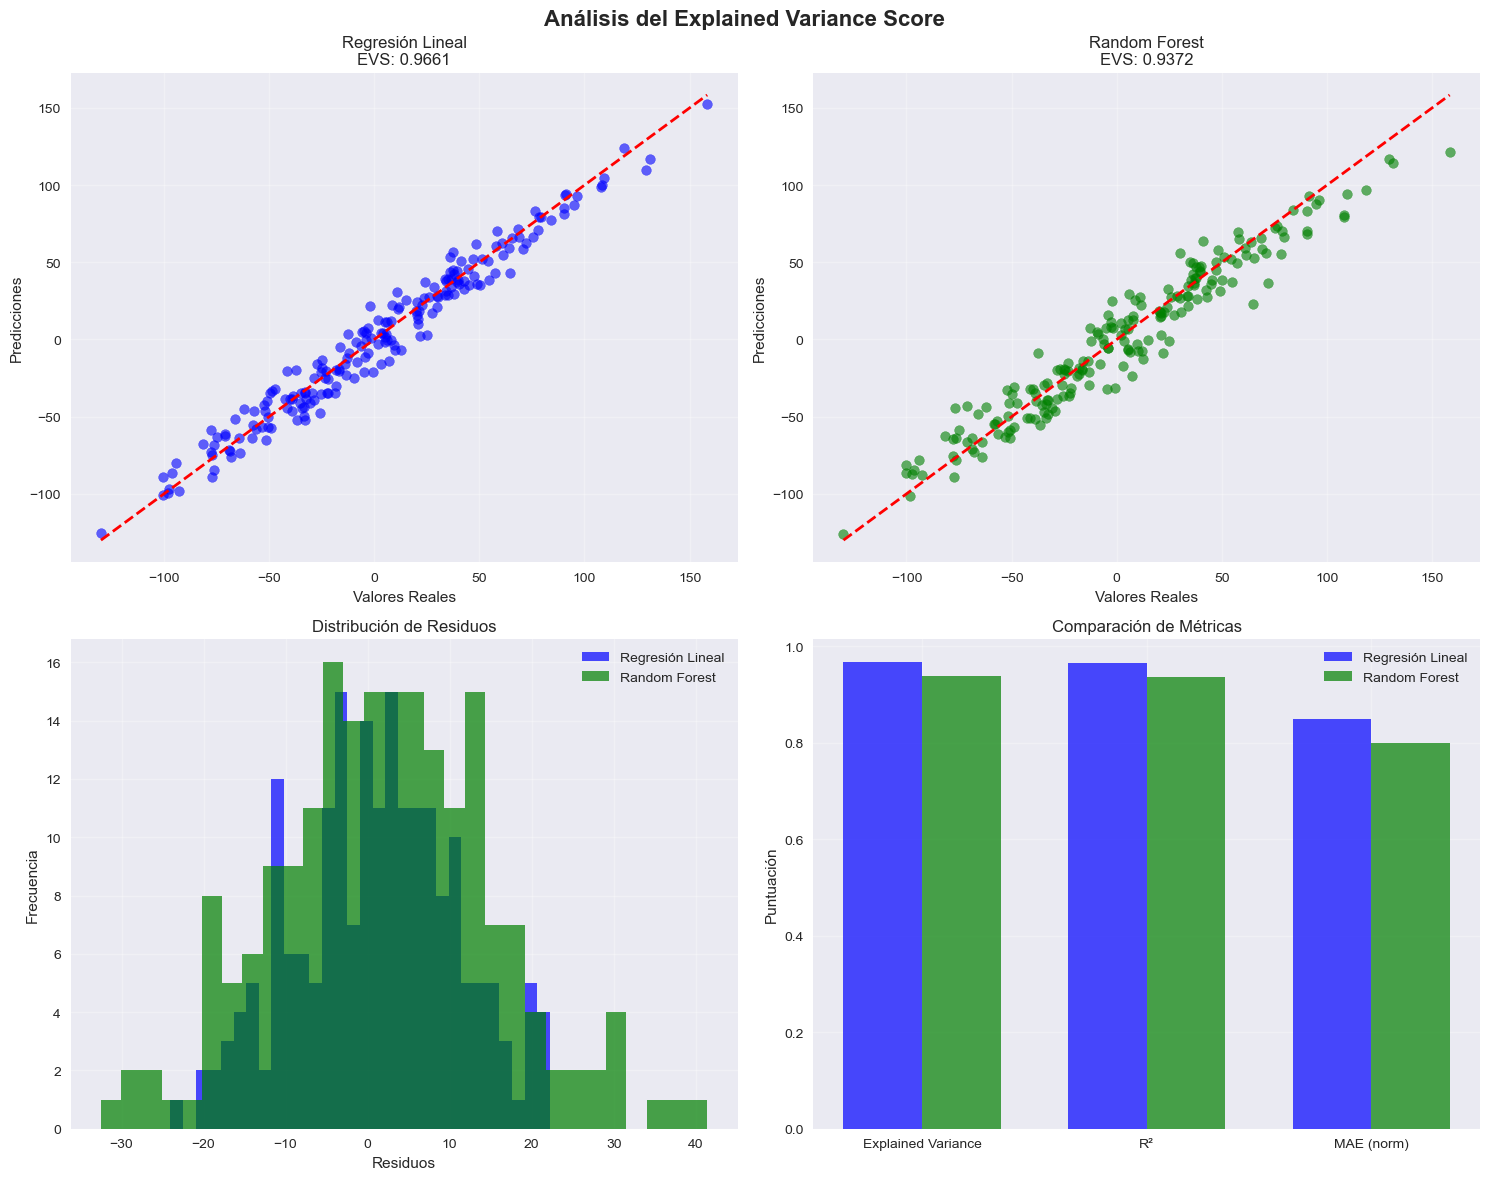

In [12]:
# 5. VISUALIZACIONES
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis del Explained Variance Score', fontsize=16, fontweight='bold')

# Gráfico 1: Regresión Lineal
axes[0, 0].scatter(y_test, lr_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Valores Reales')
axes[0, 0].set_ylabel('Predicciones')
axes[0, 0].set_title(f'Regresión Lineal\nEVS: {evs_lr:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Random Forest
axes[0, 1].scatter(y_test, rf_pred, alpha=0.6, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Valores Reales')
axes[0, 1].set_ylabel('Predicciones')
axes[0, 1].set_title(f'Random Forest\nEVS: {evs_rf:.4f}')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Distribución de residuos
residuals_lr = y_test - lr_pred
residuals_rf = y_test - rf_pred

axes[1, 0].hist(residuals_lr, bins=30, alpha=0.7, color='blue', label='Regresión Lineal')
axes[1, 0].hist(residuals_rf, bins=30, alpha=0.7, color='green', label='Random Forest')
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Residuos')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Comparación de métricas
metrics = ['Explained Variance', 'R²', 'MAE (norm)']
lr_values = [evs_lr, r2_lr, 1 - (mae_lr / np.std(y_test))]
rf_values = [evs_rf, r2_rf, 1 - (mae_rf / np.std(y_test))]

x = np.arange(len(metrics))
width = 0.35

axes[1, 1].bar(x - width/2, lr_values, width, label='Regresión Lineal', color='blue', alpha=0.7)
axes[1, 1].bar(x + width/2, rf_values, width, label='Random Forest', color='green', alpha=0.7)
axes[1, 1].set_ylabel('Puntuación')
axes[1, 1].set_title('Comparación de Métricas')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



6. ANÁLISIS DE SENSIBILIDAD AL RUIDO
---------------------------------------------
Ruido:  1 -> EVS: 0.9999
Ruido:  5 -> EVS: 0.9977
Ruido: 10 -> EVS: 0.9909
Ruido: 20 -> EVS: 0.9649
Ruido: 50 -> EVS: 0.8203


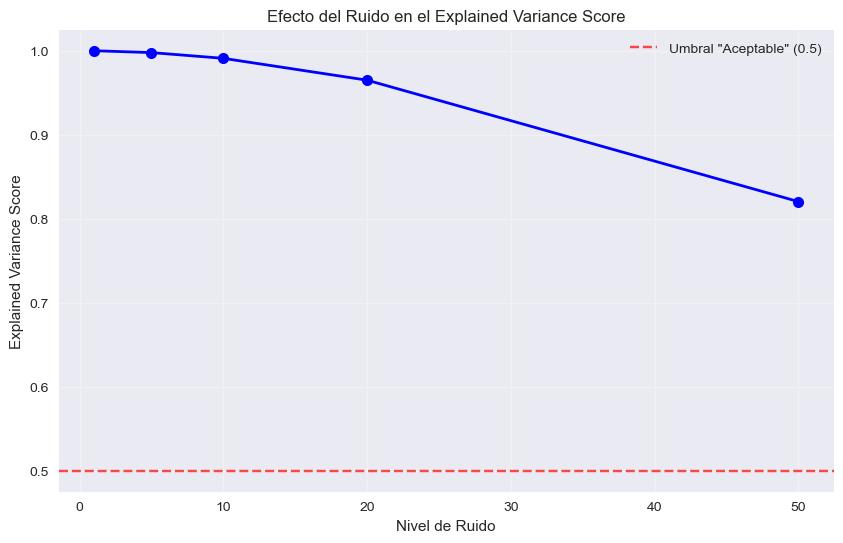

In [14]:
# 6. ANÁLISIS DE SENSIBILIDAD AL RUIDO
print("\n6. ANÁLISIS DE SENSIBILIDAD AL RUIDO")
print("-" * 45)

noise_levels = [1, 5, 10, 20, 50]
evs_scores = []

for noise in noise_levels:
    # Generar datos con diferentes niveles de ruido
    X_noise, y_noise = make_regression(n_samples=500, n_features=5, n_informative=3, 
                                       noise=noise, random_state=42)
    
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
        X_noise, y_noise, test_size=0.2, random_state=42)
    
    model_n = LinearRegression()
    model_n.fit(X_train_n, y_train_n)
    pred_n = model_n.predict(X_test_n)
    
    evs_n = explained_variance_score(y_test_n, pred_n)
    evs_scores.append(evs_n)
    
    print(f"Ruido: {noise:2d} -> EVS: {evs_n:.4f}")

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, evs_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Nivel de Ruido')
plt.ylabel('Explained Variance Score')
plt.title('Efecto del Ruido en el Explained Variance Score')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Umbral "Aceptable" (0.5)')
plt.legend()
plt.show()


In [16]:
# 7. INTERPRETACIÓN DE RESULTADOS
print("\n7. INTERPRETACIÓN DE RESULTADOS")
print("-" * 40)
print("• Un EVS > 0.7 indica un modelo con buena capacidad predictiva")
print("• Un EVS entre 0.4–0.7 sugiere un modelo moderadamente útil")
print("• Un EVS < 0.4 indica que el modelo apenas supera predicciones aleatorias")
print("• La diferencia entre EVS y R² suele ser mínima en la práctica")
print("• EVS es más robusto frente a outliers que R² en algunos contextos")



7. INTERPRETACIÓN DE RESULTADOS
----------------------------------------
• Un EVS > 0.7 indica un modelo con buena capacidad predictiva
• Un EVS entre 0.4–0.7 sugiere un modelo moderadamente útil
• Un EVS < 0.4 indica que el modelo apenas supera predicciones aleatorias
• La diferencia entre EVS y R² suele ser mínima en la práctica
• EVS es más robusto frente a outliers que R² en algunos contextos
